# Метрики precision и recall

### Метрики  
https://scikit-learn.org/stable/modules/model_evaluation.html

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [65]:
import pandas as pd

Данные о внебрачных связях, используемые для объяснения распределения времени человека между работой, временем, проведенным с супругом, и временем, проведенным с любовником. Данные используются в качестве примера регрессии с цензурированными данными.
[ссылка](https://www.statsmodels.org/dev/datasets/generated/fair.html)

In [67]:
data = pd.read_csv( 'affair_data.csv' )
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [68]:
data.shape

(6366, 9)

In [69]:
data.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [70]:
data['occupation'] = data['occupation'].astype('category')
data['occupation_husb'] = data['occupation_husb'].astype('category')

In [71]:
occ = pd.get_dummies(data['occupation'])
occ_husb = pd.get_dummies(data['occupation_husb'])
data = pd.concat([data, occ, occ_husb], axis=1)

In [75]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair,1.0,...,3.0,4.0,5.0,6.0,1.0,2.0,3.0,4.0,5.0,6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0,0,...,0,1,0,0,0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0,0,...,0,0,1,0,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0,0,...,1,0,0,0,1,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [76]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [77]:
data = data.drop(['occupation', 'occupation_husb'], axis=1)
x = data.drop(['affair'], axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, data['affair'], test_size=0.2, random_state=2)

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [79]:
model = LogisticRegression(max_iter=1000)

Обучаем модель

In [80]:
model.fit(X_train, y_train)

c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=1000)

In [81]:
predictions = model.predict_proba(X_test)

c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       853
           1       0.66      0.37      0.47       421

    accuracy                           0.73      1274
   macro avg       0.70      0.64      0.64      1274
weighted avg       0.72      0.73      0.70      1274



c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


Получаем прогнозные значения модели (переменная predictions)

In [83]:
for line in zip( predictions[:, 1], y_test ):
    print( line )
    break

(0.928688166383081, 1)


In [84]:
model.score(X_test, y_test)

c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7276295133437991

### Упражнение на интересное ознакомление

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

### Дополнительное задание

1. Постройте модель логистической регрессии с различными порогами precision, recall, f1-score в зависимости от поставленой цели

### Используем готовые библиотеки

In [85]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [86]:
pres, recl, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [87]:
# посмотрим что получилось
for line in zip( pres, recl, thres ):
    print( line )
    break

(0.3304552590266876, 1.0, 0.0402515206573534)


In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


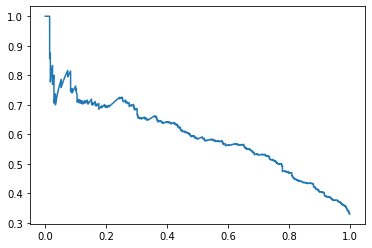

In [88]:
plt.plot( recl, pres )

In [89]:
from sklearn.metrics import average_precision_score

In [90]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.5952147393409619

### ROC

In [91]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [93]:
predictions[:, 1]

array([0.92868817, 0.65078628, 0.23905716, ..., 0.18454542, 0.2654057 ,
       0.12641151])

In [94]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [95]:
for line in zip( fpr, tpr, thres ):
    print( line )
    break

(0.0, 0.0, 1.9404109672379444)


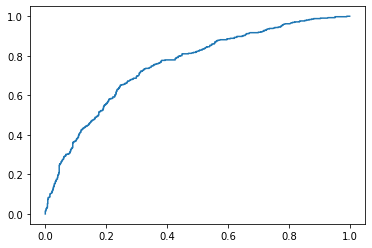

In [96]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [97]:
Xshort = data.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [98]:
model2 = LogisticRegression()

In [99]:
X_train_short, X_test_short, y_train, y_test = train_test_split( Xshort, data['affair'], test_size = 0.3, random_state = 0 )

In [100]:
model2.fit( X_train_short, y_train )

LogisticRegression()

In [101]:
predictions2 = model2.predict_proba( X_test_short )

In [102]:
fpr2, tpr2, thres2 = roc_curve( y_test, predictions2[:, 1] )

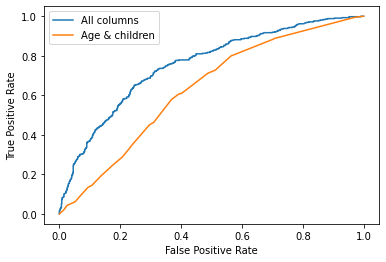

In [103]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [104]:
from sklearn.metrics import roc_auc_score

In [105]:
roc_auc_score( y_test, predictions2[:, 1] )

0.6311452091928271

In [43]:
#roc_auc_score( y_test, predictions[:, 1] )

In [106]:
from sklearn.metrics import auc

In [107]:
auc( fpr, tpr )

0.7541428464021075

In [108]:
auc( fpr2, tpr2 )

0.6311452091928271

In [109]:
X_train.shape

(5092, 18)

In [110]:
y_train.shape

(4456,)

## Пример влияния L1 и L2-регуляризации

In [111]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='saga', max_iter=1000 ).fit( X_train_short, y_train )
predictions = model1.predict_proba( X_test_short )

In [112]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train_short, y_train )
predictions2 = model2.predict_proba( X_test_short )

In [44]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001, solver='liblinear' ).fit( X_train_short, y_train )
predictions3 = model3.predict_proba( X_test_short )

In [113]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( y_test, predictions3[:, 1] )

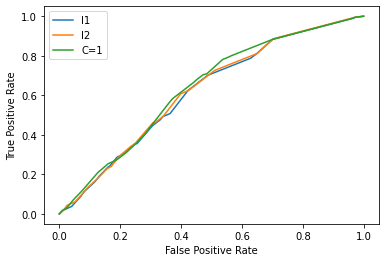

In [114]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [115]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [116]:
Y = data['affair']

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [118]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

In [119]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [120]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

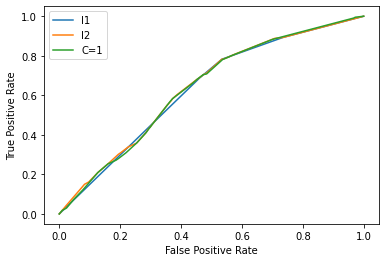

In [121]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

In [54]:
from sklearn.svm import LinearSVC

In [123]:
linearSVC = LinearSVC().fit(X_train, Y_train)
linearSVC_predict = linearSVC.predict(X_test)
y_score = linearSVC.decision_function(X_test)
linearSVC.score(X_test, Y_test)

0.6821989528795811

In [56]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.40


In [124]:
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [125]:
print('MSE = ',mean_squared_error(Y_test, linearSVC_predict))
print('Ср.абс.ош. = ',mean_absolute_error(Y_test, linearSVC_predict))
print('f1=', f1_score(Y_test, linearSVC_predict, average='macro'))

MSE =  0.31780104712041884
Ср.абс.ош. =  0.31780104712041884
f1= 0.4055399937752879


In [128]:
linearSVC_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.40')

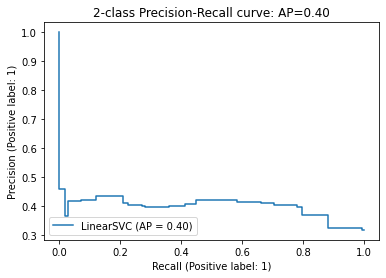

In [59]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(linearSVC, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [129]:
fpr, tpr, thres = roc_curve( Y_test, linearSVC_predict )


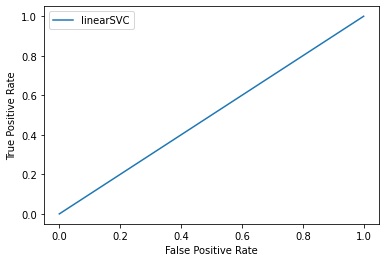

In [130]:
plt.plot( fpr, tpr, label = 'linearSVC' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend( loc = 0 )
plt.show()

In [131]:
from sklearn.linear_model import SGDClassifier

In [132]:
sgd = SGDClassifier().fit(X_train, Y_train)
#sgd_predict = sgd.predict_proba(X_test)
sgd.score(X_test, Y_test)

0.6821989528795811

In [64]:
X_test

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
2764,0,0,1,0,0,0,0,0,1,0,0,0
4481,0,1,0,0,0,0,1,0,0,0,0,0
5360,0,0,1,0,0,0,1,0,0,0,0,0
5802,0,0,0,0,0,1,0,0,1,0,0,0
1220,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3053,0,1,0,0,0,0,0,1,0,0,0,0
1875,0,0,0,0,1,0,0,0,1,0,0,0
5851,0,0,1,0,0,0,1,0,0,0,0,0
4962,0,1,0,0,0,0,1,0,0,0,0,0


In [71]:
Y_test

2764    0
4481    0
5360    0
5802    0
1220    1
       ..
3053    0
1875    1
5851    0
4962    0
1995    1
Name: affair, Length: 1910, dtype: int64